In [140]:
import pandas as pd
import numpy as np
import data_preprocess as dp
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv('./data/D2.csv')

In [142]:
df = dp.data_prep(data)

In [143]:
# drop the rows with where discharge_disposition is deceased
df = df[df.discharge_disposition != 'Deceased']

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19680 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   race                   19680 non-null  object
 1   gender                 19680 non-null  int64 
 2   age                    19680 non-null  int64 
 3   time_in_hospital       19680 non-null  int64 
 4   medical_specialty      19680 non-null  object
 5   num_lab_procedures     19680 non-null  int64 
 6   num_procedures         19680 non-null  int64 
 7   num_medications        19680 non-null  int64 
 8   number_outpatient      19680 non-null  int64 
 9   number_emergency       19680 non-null  int64 
 10  number_inpatient       19680 non-null  int64 
 11  number_diagnoses       19680 non-null  int64 
 12  metformin              19680 non-null  int64 
 13  repaglinide            19680 non-null  int64 
 14  nateglinide            19680 non-null  int64 
 15  chlorpropamide         1

In [145]:
# Step 1: Separating the features and target variable
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target

In [146]:
# Identifying categorical columns that need encoding
categorical_columns = ['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source']
numerical_columns = ['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
                     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'insulin', 'change', 'diabetesMed']

In [147]:
label_encoder = LabelEncoder()
X['age'] = label_encoder.fit_transform(X['age'])

In [148]:
X = pd.get_dummies(X, columns=categorical_columns, dtype=int)

In [149]:
X

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_type_Elective,admission_type_Emergency,admission_type_Unknown,discharge_disposition_AdditonalCare,discharge_disposition_Home,discharge_disposition_Unknown,admission_source_Emergency,admission_source_Referral,admission_source_Transfer,admission_source_Unknown
0,1,8,1,33,0,14,0,1,1,9,...,0,1,0,1,0,0,1,0,0,0
1,1,7,3,48,2,7,0,0,2,9,...,0,1,0,1,0,0,0,0,1,0
2,1,5,3,25,1,15,0,0,0,8,...,1,0,0,0,1,0,0,1,0,0
3,1,5,6,41,0,19,0,0,0,9,...,0,1,0,0,1,0,1,0,0,0
4,0,8,4,22,0,12,0,0,1,8,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,7,4,51,0,12,3,0,2,6,...,0,1,0,0,1,0,0,1,0,0
19996,0,5,9,57,2,28,3,5,5,9,...,0,1,0,1,0,0,1,0,0,0
19997,0,8,3,41,0,18,0,0,0,7,...,0,1,0,1,0,0,1,0,0,0
19998,0,5,3,49,0,15,0,0,5,9,...,0,1,0,1,0,0,1,0,0,0


In [150]:
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_mat =X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=42)

In [153]:
# Importing the model
from sklearn.linear_model import LogisticRegression


In [154]:
# Instantiating the model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [155]:
from sklearn.metrics import classification_report

# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6290650406504065
Test accuracy: 0.6395663956639567
              precision    recall  f1-score   support

           0       0.63      0.78      0.69      3107
           1       0.66      0.49      0.56      2797

    accuracy                           0.64      5904
   macro avg       0.64      0.63      0.63      5904
weighted avg       0.64      0.64      0.63      5904



In [156]:
# Predicting the test set results
feature_names = numerical_columns + categorical_columns

In [157]:
feature_names

['gender',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'insulin',
 'change',
 'diabetesMed',
 'race',
 'medical_specialty',
 'admission_type',
 'discharge_disposition',
 'admission_source']

In [158]:
# Getting the coefficients for all features
coefficients = model.coef_[0]

In [159]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(f"{feature_names[i]} -> {coef[i]:.3f}")

number_inpatient -> 0.539
admission_source_Transfer -> -0.346
race_Hispanic -> -0.326
admission_source_Unknown -> -0.309
number_emergency -> 0.305
medical_specialty_Internal Medicine -> -0.252
admission_type_Elective -> -0.231
admission_source_Emergency -> 0.229
medical_specialty_Surgical -> -0.225
race_Caucasian -> 0.223
admission_source_Referral -> 0.191
discharge_disposition_AdditonalCare -> -0.144
discharge_disposition_Home -> -0.142
medical_specialty_Other -> 0.129
chlorpropamide -> 0.113
num_medications -> 0.108
diabetesMed -> 0.107
race_Other -> -0.099
number_outpatient -> 0.094
number_diagnoses -> 0.081


In [160]:
# perform cross validation with gridsearchCV
from sklearn.model_selection import GridSearchCV


In [161]:
# defining the hyperparameters
params = {
    'C': [pow(10, x) for x in range(-6, 4)]
}

In [162]:
# Instantiating the gridsearch
grid_search = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=42),return_train_score=True, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True, verbose=1)

In [163]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")

Best parameters found: {'C': 0.1}
Best accuracy score: 0.6268836040571151


In [164]:
results = pd.DataFrame(grid_search.cv_results_)

In [165]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.064446,0.014454,0.001915,0.000543,0.000001,{'C': 1e-06},0.526125,0.526125,0.526125,0.526125,...,0.526295,0.526295,0.526295,0.526295,0.526252,0.526252,0.526252,0.526252,0.526278,0.000021
1,0.059136,0.033936,0.008231,0.011145,0.000010,{'C': 1e-05},0.531930,0.533382,0.529753,0.528302,...,0.530973,0.531134,0.531134,0.530569,0.530849,0.530688,0.531091,0.531011,0.530810,0.000301
2,0.052233,0.022511,0.001556,0.000470,0.000100,{'C': 0.0001},0.605951,0.623367,0.588534,0.592888,...,0.602920,0.602033,0.602597,0.602920,0.602710,0.601581,0.603113,0.603678,0.602029,0.001547
3,0.067272,0.021733,0.002505,0.001005,0.001000,{'C': 0.001},0.628447,0.636430,0.625544,0.626996,...,0.620584,0.619535,0.620423,0.619616,0.624002,0.622873,0.621260,0.622873,0.620564,0.002179
4,0.139832,0.028599,0.002357,0.000395,0.010000,{'C': 0.01},0.638607,0.642235,0.628447,0.629898,...,0.627843,0.625504,0.626795,0.626069,0.628841,0.628035,0.627067,0.629648,0.626710,0.001944
5,0.211523,0.037730,0.002868,0.002075,0.100000,{'C': 0.1},0.641509,0.650218,0.632075,0.635704,...,0.627924,0.626633,0.629295,0.628166,0.630051,0.631180,0.627954,0.629809,0.628283,0.001710
6,0.209535,0.036879,0.002455,0.000691,1.000000,{'C': 1},0.639332,0.647315,0.632075,0.634978,...,0.628569,0.626956,0.629779,0.627359,0.629970,0.631341,0.627551,0.630131,0.628452,0.001664
7,0.202422,0.058251,0.005560,0.006896,10.000000,{'C': 10},0.639332,0.648041,0.631350,0.635704,...,0.628246,0.626714,0.629698,0.627440,0.630131,0.631341,0.627309,0.630293,0.628404,0.001723
8,0.199898,0.042862,0.002755,0.001013,100.000000,{'C': 100},0.640058,0.648041,0.631350,0.634978,...,0.628246,0.626875,0.629698,0.627440,0.629809,0.631422,0.627389,0.630293,0.628412,0.001677
9,0.152968,0.021134,0.002010,0.000490,1000.000000,{'C': 1000},0.640058,0.648041,0.631350,0.634978,...,0.628246,0.626875,0.629698,0.627440,0.629809,0.631422,0.627389,0.630293,0.628412,0.001677


In [166]:
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']


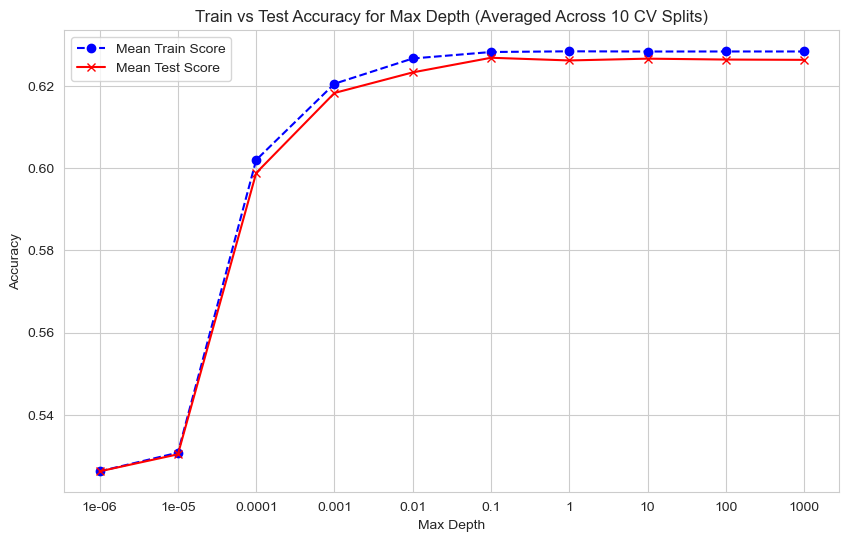

In [167]:
# Plot the results for max_depth
plt.figure(figsize=(10, 6))
plt.plot(mean_train_scores.index, mean_train_scores, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(mean_test_scores.index, mean_test_scores, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Max Depth (Averaged Across 10 CV Splits)')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.legend()
plt.grid(True)
plt.show()

In [168]:
grid_search.best_params_

{'C': 0.1}

In [169]:
# Using the best hyperparameters
best_model = LogisticRegression(C=0.1, random_state=42)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [170]:
# training and test accuracy
print("Train accuracy:", best_model.score(X_train, y_train))
print("Test accuracy:", best_model.score(X_test, y_test))


Train accuracy: 0.6289924506387921
Test accuracy: 0.638550135501355


In [171]:
from sklearn.feature_selection import RFECV

In [172]:
rfe = RFECV(estimator=LogisticRegression(C=0.1, random_state=42), cv=10)
rfe.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(C=0.1, random_state=42))

In [173]:
print(f"Original feature set: {X_train.shape[1]}")
print(f"Optimal number of features : {rfe.n_features_}")

Original feature set: 42
Optimal number of features : 40


In [174]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)